# Initial Data Exploration 


In [1]:
import pandas as pd

## receivals.csv 

Exploration of the receivals.csv dataset to understand its structure and content.
The goal is to see how the different columns relate to each other and to understand what each row represents. We want to check the uniqueness of each row, look at how purchases are linked to suppliers, materials, products, and items, and see how these elements connect.

In [2]:
receivals = pd.read_csv("../../data/kernel/receivals.csv")
#receivals.head()

### Number of unique orders, materials and products  

In [3]:

unique_orders_count = receivals["purchase_order_id"].nunique()
unique_products_count = receivals["product_id"].nunique()
unique_materials_count = receivals["rm_id"].nunique()
print(f"Number of unique purchase orders: {unique_orders_count}")
print(f"Number of unique products: {unique_products_count}")
print(f"Number of unique raw materials: {unique_materials_count}")

Number of unique purchase orders: 7173
Number of unique products: 54
Number of unique raw materials: 203


### Number of material per order 

In [4]:
rm_per_order = (
    receivals.groupby("purchase_order_id")["rm_id"]
    .nunique()
    .reset_index(name="unique_rm_count")
)

#print(rm_per_order.head())
distribution = rm_per_order["unique_rm_count"].value_counts().sort_index()
print("\nDistribution of number of unique materials per order:")
print(distribution)


Distribution of number of unique materials per order:
unique_rm_count
1     5026
2     1082
3      305
4      231
5      161
6      106
7       73
8       62
9       45
10      38
11      22
12      10
13       3
14       4
15       1
16       1
22       1
24       2
Name: count, dtype: int64


### Number of products per order

In [5]:
products_per_order = (
    receivals.groupby("purchase_order_id")["product_id"]
    .nunique()
    .reset_index(name="unique_product_count")
)

distribution = products_per_order["unique_product_count"].value_counts().sort_index()
print("\nDistribution of number of unique products per order:")
print(distribution)


Distribution of number of unique products per order:
unique_product_count
1    5727
2     696
3     313
4     196
5     175
6      60
7       5
8       1
Name: count, dtype: int64


### Number of material per product 

In [6]:
rm_per_product = (
    receivals.groupby("product_id")["rm_id"]
    .nunique()
    .reset_index(name="unique_rm_count")
)

multi_rm_products = rm_per_product[rm_per_product["unique_rm_count"] > 1]

print(f"\nNumber of products with multiple raw materials: {len(multi_rm_products)}")
#print(multi_rm_products.head()) 

distribution = rm_per_product["unique_rm_count"].value_counts().sort_index()
print("\nDistribution of number of materials per product:")
print(distribution)


Number of products with multiple raw materials: 37

Distribution of number of materials per product:
unique_rm_count
1     17
2     15
3      9
4      1
5      1
7      2
8      2
9      2
11     2
15     1
16     1
20     1
Name: count, dtype: int64


### Number of products per material 

In [7]:
products_per_material = (
    receivals.groupby("rm_id")["product_id"]
    .nunique()
    .reset_index(name="unique_product_count")
)

multi_product_materials = products_per_material[products_per_material["unique_product_count"] > 1]

print(f"Number of materials used in multiple products: {len(multi_product_materials)}")
print(multi_product_materials.head())  

distribution = products_per_material["unique_product_count"].value_counts().sort_index()
print("\nDistribution of products per material:")
print(distribution)

Number of materials used in multiple products: 1
      rm_id  unique_product_count
161  3362.0                     2

Distribution of products per material:
unique_product_count
1    202
2      1
Name: count, dtype: int64


### Receival status 

In [8]:
status_counts = receivals["receival_status"].value_counts(dropna=False)

print(f"Number of unique receival statuses: {status_counts.nunique()}\n")
print("Counts per status:")
print(status_counts)

Number of unique receival statuses: 4

Counts per status:
receival_status
Completed             122448
Finished unloading       106
Start unloading           32
Planned                    4
Name: count, dtype: int64


In [ ]:
#Order and status: not-completed 
non_completed = receivals[receivals["receival_status"] != "Completed"]
non_completed_orders = set(non_completed["purchase_order_id"])
orders_with_completed = set(
    receivals[receivals["receival_status"] == "Completed"]["purchase_order_id"]
)

overlap_orders = non_completed_orders & orders_with_completed
only_non_completed_orders = non_completed_orders - orders_with_completed

print(f"Total orders with non-completed status: {len(non_completed_orders)}")
print(f"Of these, {len(overlap_orders)} also have a 'Completed' row.")
print(f"And {len(only_non_completed_orders)} orders have NO completed rows.")
print("\nExamples of orders with only non-completed status:")
print(list(only_non_completed_orders)[:10])

Total orders with non-completed status: 111
Of these, 66 also have a 'Completed' row.
And 45 orders have NO completed rows.

Examples of orders with only non-completed status:
[nan, nan, nan, nan, nan, nan, 318731.0, nan, nan, nan]


In [13]:
receivals["date_arrival"] = pd.to_datetime(
    receivals["date_arrival"], errors="coerce", utc=True
)

First date with non-completed status: 2020-12-04 10:08:18+00:00
Last date with non-completed status: 2024-12-10 09:55:00+00:00


/var/folders/fs/4p4jj3l97tzbcmw_8hxg7r480000gn/T/ipykernel_46759/3820131762.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  non_completed_by_month = non_completed["date_arrival"].dt.to_period("M").value_counts().sort_index()


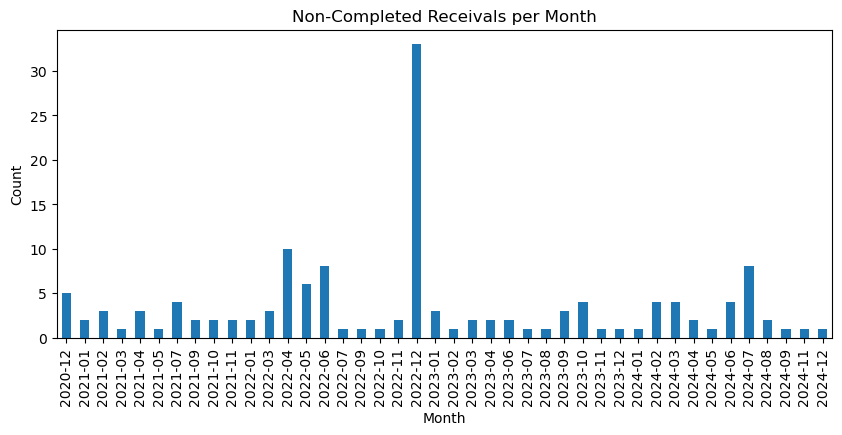

In [ ]:
import matplotlib.pyplot as plt

non_completed = receivals[receivals["receival_status"] != "Completed"].copy()

non_completed["date_arrival"] = pd.to_datetime(non_completed["date_arrival"], errors="coerce")

first_date = non_completed["date_arrival"].min()
last_date = non_completed["date_arrival"].max()

print(f"First date with non-completed status: {first_date}")
print(f"Last date with non-completed status: {last_date}")

non_completed_by_month = non_completed["date_arrival"].dt.to_period("M").value_counts().sort_index()

non_completed_by_month.plot(kind="bar", figsize=(10,4))
plt.title("Non-Completed Receivals per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


### Products / Supplier 


=== Products per Supplier ===
Total suppliers: 255
Mean products per supplier: 3.52
Median products per supplier: 3.0
Mode (most common number of products per supplier): 1
Suppliers with 1 product: 70
Suppliers with 2 products: 46
Suppliers with 3 products: 31

Top suppliers by number of products:
     supplier_id  unique_product_count
207        70515                    19
19         50315                    15
47         53797                    12
241        77694                    11
97         61261                    10
246        82697                    10
230        74230                     9
37         52064                     9
121        64355                     9
20         50350                     9


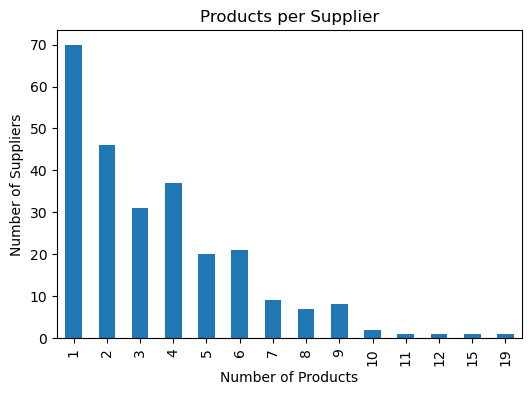

In [34]:
# --- 1) Products per supplier ---
products_per_supplier = (
    receivals.groupby("supplier_id")["product_id"]
    .nunique()
    .reset_index(name="unique_product_count")
    .sort_values("unique_product_count", ascending=False)
)

print("=== Products per Supplier ===")
print(f"Total suppliers: {products_per_supplier.shape[0]}")
print(f"Mean products per supplier: {products_per_supplier['unique_product_count'].mean():.2f}")
print(f"Median products per supplier: {products_per_supplier['unique_product_count'].median()}")
print(f"Mode (most common number of products per supplier): {products_per_supplier['unique_product_count'].mode().iloc[0]}")
print(f"Suppliers with 1 product: {(products_per_supplier['unique_product_count'] == 1).sum()}")
print(f"Suppliers with 2 products: {(products_per_supplier['unique_product_count'] == 2).sum()}")
print(f"Suppliers with 3 products: {(products_per_supplier['unique_product_count'] == 3).sum()}")

print("\nTop suppliers by number of products:")
print(products_per_supplier.head(10))
pps_counts = products_per_supplier["unique_product_count"].value_counts().sort_index()

plt.figure(figsize=(6,4))
pps_counts.plot(kind="bar")
plt.title("Products per Supplier")
plt.xlabel("Number of Products")
plt.ylabel("Number of Suppliers")
plt.show()


=== Suppliers per Product ===
Total products: 54
Mean suppliers per product: 16.61
Median suppliers per product: 5.0
Mode (most common number of suppliers per product): 3
Products with 1 supplier: 7
Products with 2 suppliers: 7
Products with 3 suppliers: 8

Top products by number of suppliers:
    product_id  unique_supplier_count
12  91900143.0                    109
16  91900170.0                     86
26  91900302.0                     84
29  91900330.0                     81
35  91901201.0                     73
13  91900146.0                     52
32  91900871.0                     46
15  91900160.0                     45
25  91900296.0                     39
19  91900182.0                     31


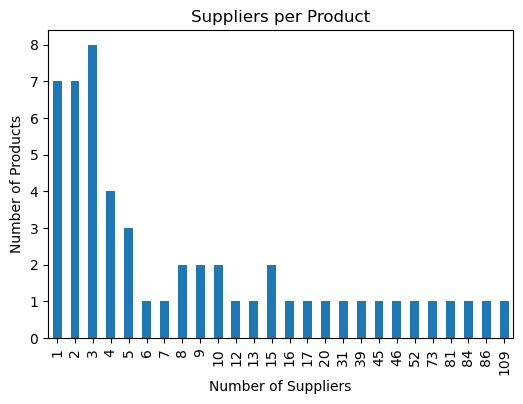

In [35]:
# --- 2) Suppliers per product ---
total_products = receivals["product_id"].nunique(dropna=True)

suppliers_per_product = (
    receivals.groupby("product_id")["supplier_id"]
    .nunique()
    .reset_index(name="unique_supplier_count")
    .sort_values("unique_supplier_count", ascending=False)
)

print("\n=== Suppliers per Product ===")
print(f"Total products: {total_products}")
print(f"Mean suppliers per product: {suppliers_per_product['unique_supplier_count'].mean():.2f}")
print(f"Median suppliers per product: {suppliers_per_product['unique_supplier_count'].median()}")
print(f"Mode (most common number of suppliers per product): {suppliers_per_product['unique_supplier_count'].mode().iloc[0]}")
print(f"Products with 1 supplier: {(suppliers_per_product['unique_supplier_count'] == 1).sum()}")
print(f"Products with 2 suppliers: {(suppliers_per_product['unique_supplier_count'] == 2).sum()}")
print(f"Products with 3 suppliers: {(suppliers_per_product['unique_supplier_count'] == 3).sum()}")

print("\nTop products by number of suppliers:")
print(suppliers_per_product.head(10))


spp_counts = suppliers_per_product["unique_supplier_count"].value_counts().sort_index()

plt.figure(figsize=(6,4))
spp_counts.plot(kind="bar")
plt.title("Suppliers per Product")
plt.xlabel("Number of Suppliers")
plt.ylabel("Number of Products")
plt.show()

/var/folders/fs/4p4jj3l97tzbcmw_8hxg7r480000gn/T/ipykernel_46759/2284840099.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  top_supplier_data.groupby([top_supplier_data["date_arrival"].dt.to_period("M"), "supplier_id"])


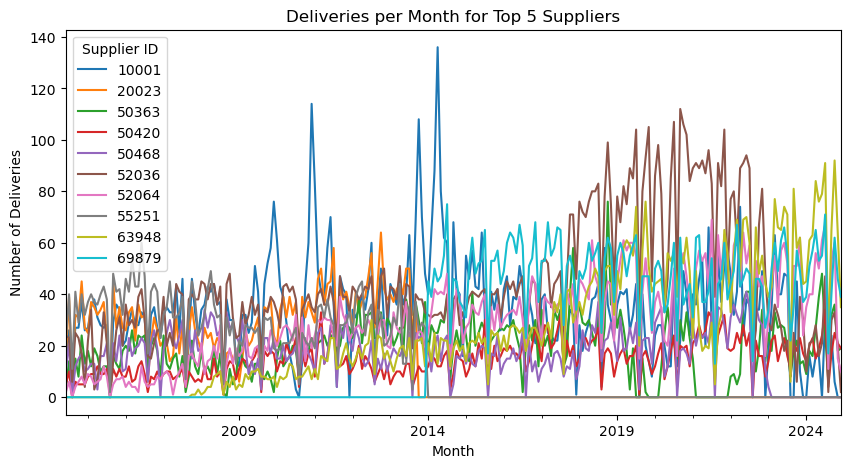

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Pass på at datoen er i datetime-format
receivals["date_arrival"] = pd.to_datetime(receivals["date_arrival"], errors="coerce")

# Velg for eksempel de 5 leverandørene med flest leveranser
top_suppliers = (
    receivals["supplier_id"].value_counts().head(10).index
)

# Filtrer til kun disse
top_supplier_data = receivals[receivals["supplier_id"].isin(top_suppliers)]

# Lag en pivot som teller leveranser per måned per supplier
deliveries_per_month = (
    top_supplier_data.groupby([top_supplier_data["date_arrival"].dt.to_period("M"), "supplier_id"])
    .size()
    .unstack(fill_value=0)
)

# Plot som linjer
deliveries_per_month.plot(figsize=(10,5))
plt.title("Deliveries per Month for Top 5 Suppliers")
plt.xlabel("Month")
plt.ylabel("Number of Deliveries")
plt.legend(title="Supplier ID")
plt.show()
